# Mounting Drive
Mounting drive to fetch dataset and other resources from the drive

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installing Spektral Library


In [4]:
!pip install git+https://github.com/danielegrattarola/spektral

  Cloning https://github.com/danielegrattarola/spektral to /tmp/pip-req-build-oyoe7pik
  Running command git clone -q https://github.com/danielegrattarola/spektral /tmp/pip-req-build-oyoe7pik


# Loading Label Files

In [5]:
# Dataset loading
import os

dataset = "/content/drive/MyDrive/Project GCN Dataset/Dataset (Labelled Images)/"
lab_files_path = dataset+"Labels/"

files = os.listdir(lab_files_path)
print("Total Label files are: ", len(files))

Total Label files are:  129


# Sparse Matrix Creation

Iterate all the csv files and do the following three steps:
1. Make a graph of CSV file.
2. Turn the graph into adjacency matrix.
3. Append that adjacency matrix into sparce matrix(i.e. bigger matrix)

# DON'T RUN THIS TAKES A HELL LOT OF TIME
# SPARCE MATRIX IS ALREADY CREATED AND SAVED

In [ ]:
import pandas as pd
import Mat_Package.Grapher as GMaker
import Mat_Package.MatricesOverDiagonal as DiagPlacer
import networkx as nx
import numpy as np
from numpy.core.fromnumeric import shape


Z_file = lab_files_path + files[0]
df = pd.read_csv(Z_file)
G = GMaker.makeGraph(df)
M = nx.to_numpy_array(G, dtype=np.int32)


for i in range(1, len(files)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = GMaker.makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M = DiagPlacer.resizeMatrix(M, I)
    
print("Final Matix Done")
print("Dimentions of sparce matrix are: ", np.shape(M))


In [6]:
import pandas as pd
import networkx as nx
import numpy as np
from numpy.core.fromnumeric import shape

# Geometric Algorithms for converting dataframes to Graphs
It connects a node with its neighbouring nodes  

In [ ]:
from PIL.Image import Image
import networkx as nx
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
from PIL import Image


# csv = './A-10.csv'
# df = pd.read_csv(csv)
df = 0
xMIN, xMAX = [], []
yMIN, yMAX = [], []
Text = []


def findRight(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMIN[i] > xmax):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)

    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMIN[consec] > xMIN[j]):
                consec = j
        return consec

    return -1


def findLeft(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMAX[i] < xmin):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)
    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMAX[j] > xMAX[consec]):
                consec = j
        return consec
    return -1


def findUp(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]

    for i in range(len(df)):
        if(yMAX[i] < ymin):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)
    # print(S_list)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMAX[j] > yMAX[consec]):
                consec = j
        return consec

    return -1


def findDown(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(yMIN[i] > ymax):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)
    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMIN[j] < yMIN[consec]):
                consec = j
        return consec

    return -1


def makeGraph(df):
    G = nx.Graph()
    xMIN = df['xmin']
    xMAX = df['xmax']
    yMIN = df['ymin']
    yMAX = df['ymax']
    Text = df['Object']

    for i in range(len(df)):
        if findUp(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findUp(df, i, xMIN, xMAX, yMIN, yMAX)
            if(l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findRight(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findRight(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findDown(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findDown(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findLeft(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findLeft(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
    return G


# Matrices Over Diagonal
Place an incident Matrix over diagonal with existing matrix

In [ ]:
from typing import SupportsAbs
import numpy as np
from numpy.core.fromnumeric import shape

# Test Matrices
# mat1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# mat2 = np.array([[3, 2, 1, 7], [6, 5, 4, 9], [9, 8, 7, 4], [1, 5, 7, 2]])


def alignDiagonally(M1, M2, prev_Len):
    for i in range(prev_Len, np.shape(M1)[0]):
        for j in range(prev_Len, np.shape(M1)[0]):
            x = i - prev_Len
            y = j - prev_Len
            M1[i][j] = M2[x][y]
    return M1


def resizeMatrix(M, I):
    oldMat_Len = np.shape(M)[0]
    z = np.zeros((oldMat_Len, np.shape(I)[0]), dtype=np.int64)
    newArray = np.append(M, z, axis=1)
    M = newArray

    # Appending 1D arrays of zeros in the original Matrix
    # (i.e. the matrix in which we want to align othe rmatrices diagonally)
    # for i in range(appZero):
    #     M = np.vstack((M, L))
    appZero = np.shape(I)[0]
    x = oldMat_Len + appZero
    L = np.zeros((np.shape(I)[0], x), dtype=np.int64)
    newArray = np.append(M, L, axis=0)
    M = newArray

    M = alignDiagonally(M, I, oldMat_Len)
    return M


# print(resizeMatrix(mat1, mat2))


# Dividing Dataset into smaller datasets
Creating a total of four sparse matrices and saving it to drive. 

# Dataset Batch 1

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from numpy.core.fromnumeric import shape

Z_file = lab_files_path + files[0]
df = pd.read_csv(Z_file)
G = makeGraph(df)
M1 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, 26):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M1 = resizeMatrix(M1, I)

print("Dimentions of Batch 1 matrix is: ", np.shape(M1))


= = = = = = = = = = = = = = = =
Iteration No.:  1

= = = = = = = = = = = = = = = =
Iteration No.:  2

= = = = = = = = = = = = = = = =
Iteration No.:  3

= = = = = = = = = = = = = = = =
Iteration No.:  4

= = = = = = = = = = = = = = = =
Iteration No.:  5

= = = = = = = = = = = = = = = =
Iteration No.:  6

= = = = = = = = = = = = = = = =
Iteration No.:  7

= = = = = = = = = = = = = = = =
Iteration No.:  8

= = = = = = = = = = = = = = = =
Iteration No.:  9

= = = = = = = = = = = = = = = =
Iteration No.:  10

= = = = = = = = = = = = = = = =
Iteration No.:  11

= = = = = = = = = = = = = = = =
Iteration No.:  12

= = = = = = = = = = = = = = = =
Iteration No.:  13

= = = = = = = = = = = = = = = =
Iteration No.:  14

= = = = = = = = = = = = = = = =
Iteration No.:  15

= = = = = = = = = = = = = = = =
Iteration No.:  16

= = = = = = = = = = = = = = = =
Iteration No.:  17

= = = = = = = = = = = = = = = =
Iteration No.:  18

= = = = = = = = = = = = = = = =
Iteration No.:  19

= = = = = = = = = = 

# Dataset Batch 2

In [ ]:
Z1_file = lab_files_path + files[26]
df = pd.read_csv(Z1_file)
G = makeGraph(df)
M2 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(27, 65):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M2 = resizeMatrix(M2, I)

print("Dimentions of Batch 2 matrix is: ", np.shape(M2))  


= = = = = = = = = = = = = = = =
Iteration No.:  27

= = = = = = = = = = = = = = = =
Iteration No.:  28

= = = = = = = = = = = = = = = =
Iteration No.:  29

= = = = = = = = = = = = = = = =
Iteration No.:  30

= = = = = = = = = = = = = = = =
Iteration No.:  31

= = = = = = = = = = = = = = = =
Iteration No.:  32

= = = = = = = = = = = = = = = =
Iteration No.:  33

= = = = = = = = = = = = = = = =
Iteration No.:  34

= = = = = = = = = = = = = = = =
Iteration No.:  35

= = = = = = = = = = = = = = = =
Iteration No.:  36

= = = = = = = = = = = = = = = =
Iteration No.:  37

= = = = = = = = = = = = = = = =
Iteration No.:  38

= = = = = = = = = = = = = = = =
Iteration No.:  39

= = = = = = = = = = = = = = = =
Iteration No.:  40

= = = = = = = = = = = = = = = =
Iteration No.:  41

= = = = = = = = = = = = = = = =
Iteration No.:  42

= = = = = = = = = = = = = = = =
Iteration No.:  43

= = = = = = = = = = = = = = = =
Iteration No.:  44

= = = = = = = = = = = = = = = =
Iteration No.:  45

= = = = = =

# Dataset Batch 3

In [ ]:
Z2_file = lab_files_path + files[65]
df = pd.read_csv(Z2_file)
G = makeGraph(df)
M3 = nx.to_numpy_array(G, dtype=np.int32)
    
for i in range(66, 100):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M3 = resizeMatrix(M3, I)

print("Dimentions of Batch 3 matrix is: ", np.shape(M3))


= = = = = = = = = = = = = = = =
Iteration No.:  66

= = = = = = = = = = = = = = = =
Iteration No.:  67

= = = = = = = = = = = = = = = =
Iteration No.:  68

= = = = = = = = = = = = = = = =
Iteration No.:  69

= = = = = = = = = = = = = = = =
Iteration No.:  70

= = = = = = = = = = = = = = = =
Iteration No.:  71

= = = = = = = = = = = = = = = =
Iteration No.:  72

= = = = = = = = = = = = = = = =
Iteration No.:  73

= = = = = = = = = = = = = = = =
Iteration No.:  74

= = = = = = = = = = = = = = = =
Iteration No.:  75

= = = = = = = = = = = = = = = =
Iteration No.:  76

= = = = = = = = = = = = = = = =
Iteration No.:  77

= = = = = = = = = = = = = = = =
Iteration No.:  78

= = = = = = = = = = = = = = = =
Iteration No.:  79

= = = = = = = = = = = = = = = =
Iteration No.:  80

= = = = = = = = = = = = = = = =
Iteration No.:  81

= = = = = = = = = = = = = = = =
Iteration No.:  82

= = = = = = = = = = = = = = = =
Iteration No.:  83

= = = = = = = = = = = = = = = =
Iteration No.:  84

= = = = = =

# Dataset Batch 4


In [ ]:
Z3_file = lab_files_path + files[100]
df = pd.read_csv(Z3_file)
G = makeGraph(df)
M4 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(101, len(files)):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M4 = resizeMatrix(M4, I)

print("Dimentions of Batch 4 matrix is: ", np.shape(M4))



= = = = = = = = = = = = = = = =
Iteration No.:  101

= = = = = = = = = = = = = = = =
Iteration No.:  102

= = = = = = = = = = = = = = = =
Iteration No.:  103

= = = = = = = = = = = = = = = =
Iteration No.:  104

= = = = = = = = = = = = = = = =
Iteration No.:  105

= = = = = = = = = = = = = = = =
Iteration No.:  106

= = = = = = = = = = = = = = = =
Iteration No.:  107

= = = = = = = = = = = = = = = =
Iteration No.:  108

= = = = = = = = = = = = = = = =
Iteration No.:  109

= = = = = = = = = = = = = = = =
Iteration No.:  110

= = = = = = = = = = = = = = = =
Iteration No.:  111

= = = = = = = = = = = = = = = =
Iteration No.:  112

= = = = = = = = = = = = = = = =
Iteration No.:  113

= = = = = = = = = = = = = = = =
Iteration No.:  114

= = = = = = = = = = = = = = = =
Iteration No.:  115

= = = = = = = = = = = = = = = =
Iteration No.:  116

= = = = = = = = = = = = = = = =
Iteration No.:  117

= = = = = = = = = = = = = = = =
Iteration No.:  118

= = = = = = = = = = = = = = = =
Iteration No.

# Verifying dataset batches size

In [ ]:
t_size = np.shape(M1)[0] + np.shape(M2)[0]  + np.shape(M3)[0] + np.shape(M4)[0] 
print("Overall dimention is: ", t_size)

Overall dimention is:  21097


# Saving the four Matrices
Saving the matrices named Mat_batch(no.)

In [ ]:
np.save("drive/MyDrive/Project GCN Dataset/Mat_b1.npy", M1)
np.save("drive/MyDrive/Project GCN Dataset/Mat_b2.npy", M2)
np.save("drive/MyDrive/Project GCN Dataset/Mat_b3.npy", M3)
np.save("drive/MyDrive/Project GCN Dataset/Mat_b4.npy", M4)

# Saving Matrix

# MATRIX ALREADY SAVED
# PLEASE DONOT RUN THIS CELL

In [ ]:
print("Saving Matrix")
np.save("drive/MyDrive/Project GCN Dataset/Matrix.npy", M)

print("Saved")

# Loading Matrix
Loading the sparce matrix in a variable A.

In [7]:
import numpy as np

# loading matrix
A = np.load("/content/drive/MyDrive/Project GCN Dataset/Mat_b1.npy")
print("Printing Sparse Matrix..")
print(A)
print(np.shape(A))

Printing Sparse Matrix..
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
(5762, 5762)


# Checking Sparse Matrix

(5762, 5762)


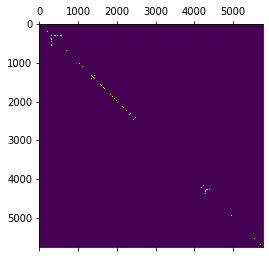

In [8]:
import matplotlib.pyplot as plt

plt.matshow(A)
print(np.shape(A))

# Generating Labels

In [9]:
from numpy import nan
import pandas as pd


def returnLabels(direc, files):
    labels = []
    for f in range(len(files)):
        seenList = []
        df = pd.read_csv(direc + files[f])
        text = df['Object'].to_list()
        T_labels = df['labels'].to_list()

        for i in range(len(text)):
            if(text[i] not in seenList):
                labels.append(T_labels[i])
            seenList.append(text[i])

    return labels
  


# Encoding Labels
1. Get a list of labels from CSV files.
2. Catagorically encode the labels 

In [10]:
from sklearn.preprocessing import LabelEncoder

labels = returnLabels(lab_files_path, files)
print("Total labels are: ", len(labels))

print("Encoding list..")
lab_encoder = LabelEncoder()
encodings = lab_encoder.fit_transform(labels)
print("Total Encodings are: ", len(encodings))


# t_file = open("Encodings.txt", "w")
# for element in encodings:
#     t_file.write("%i\n" % element)

# t_file.close()


uni_enc = set(encodings)
print("Unique Encodings are: ", uni_enc)
encodings = np.transpose(encodings)  

# Encodings for Mat_b1 are
e1_encodings_size = np.shape(A)[0]
print("Size of batch1 matrix is: ", e1_encodings_size)
e1 = encodings[0:e1_encodings_size]
print("Total encodings for batch1 matrix are: ", len(e1))

print("Encodings for Batch 1 Matrix is: ", set(e1))


Total labels are:  21097
Encoding list..
Total Encodings are:  21097
Unique Encodings are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
Size of batch1 matrix is:  5762
Total encodings for batch1 matrix are:  5762
Encodings for Batch 1 Matrix is:  {2, 3, 5, 6, 8, 9, 10, 11}


# Importing Libraries

In [11]:
from sklearn.utils import shuffle

# from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2


from spektral.utils.sparse import sp_matrix_to_sp_tensor
from spektral.layers import GCNConv
from sklearn.metrics import classification_report
from spektral.utils import normalized_laplacian
from spektral.utils.sparse import sp_matrix_to_sp_tensor

import matplotlib.pyplot as plt
print("Libraries Imported..")


Libraries Imported..


# Model Hyper-parameters
Adding model hyper-parameters:
1. Learning rate(At whar pace should the model be learning)
2. Channels(Neurons)
3. Dropout rate(Now many neurons should be active at a time)
4. Epochs(How many times a data is passed through the model)
5. Batch size(How much data should be fed to the model at a time)
etc

In [12]:
# Hyper-parameters
channels = 32
dropout = 0.5
# learning_rate = 5e-4
l2_reg = 0.001
learning_rate = 0.005
epochs = 200
batch_size = 5762
es_patience = 10

# # Parameters
# channels = 16           # Number of channels in the first layer
# dropout = 0.5           # Dropout rate for the features
# l2_reg = 5e-4           # L2 regularization rate
# learning_rate = 1e-2    # Learning rate
# epochs = 200            # Number of training epochs
# es_patience = 10        # Patience for early stopping

# Getting Node Features



In [13]:
# X = Features Matrix
X = np.matrix([[i, -i] for i in range(A.shape[0])], dtype=float)
print("Printing Feature Matrix..")
print(X)

# Identity matrix of the same shape as adjacency matrix
I = np.matrix(np.eye(A.shape[0]))

# Self looping making node connections with themselves
# i.e. multiply the adjacency matrix with identity matrix
A_new = A + I

# Multiplying the self-looped graph with the feature matrix

# Stores the sum of array(Row wise) in a new array called D
D = np.array(np.sum(A, axis=0))[0]

# Making the diagonal matrix named D containing the elements of 1D array D
# D = np.matrix(np.diag(D))
# print("Printing the 2D array named D containing the elemnets of 1D D in diagonal")
# print(D)

# Stores the degree of the graph in a 1D array called D
D = np.array(np.sum(A_new, axis=0))[0]
# Transforming that 1D array to a degree matrix
D = np.matrix(np.diag(D))
# print("Degree matrix of A_new multiplied by A_new..")
D_new = D * A_new
# print(D_new)

# Weight Matrix
W0 = np.random.randn(X.shape[1], 8) * 0.01

# Reducing feature of output feature representation..
print("Output feature representation..")
final = D**-1 * A_new * X * W0


def relu(x):
    return np.maximum(0, x)


H_1 = relu(final)
# print("After applying relu function..")
# print(H_1)

output = H_1

# print("Printing A_new matrix..")
# print(A_new)

G = nx.from_numpy_matrix(np.array(A_new))
# nx.draw_networkx_edges(G, pos=nx.spring_layout(
#     G), arrowstyle="<|-", style="dashed")
# plt.show()
# nx.draw(G)
# plt.savefig("/content/Sample Graph.png")
feature_representations = {
    node: np.array(output)[node]
    for node in G.nodes()
}

features = np.array(feature_representations.values())

# print("Printing feature representation..")
# print(features)

vals = []

for v in feature_representations.values():
  vals.append(v)

vals = np.array(vals)

print("Prining features in an array", vals)

print("Shape of vals is: ", np.shape(vals))



Printing Feature Matrix..
[[ 0.000e+00  0.000e+00]
 [ 1.000e+00 -1.000e+00]
 [ 2.000e+00 -2.000e+00]
 ...
 [ 5.759e+03 -5.759e+03]
 [ 5.760e+03 -5.760e+03]
 [ 5.761e+03 -5.761e+03]]
Output feature representation..
Prining features in an array [[ 0.          0.          0.50729335 ...  0.          0.
   0.22625203]
 [ 0.          0.          0.40261377 ...  0.          0.
   0.17956511]
 [ 0.          0.          0.56969848 ...  0.          0.
   0.25408462]
 ...
 [ 0.          0.         92.43475256 ...  0.          0.
  41.22575404]
 [ 0.          0.         92.30484252 ...  0.          0.
  41.16781437]
 [ 0.          0.         92.55083953 ...  0.          0.
  41.27752865]]
Shape of vals is:  (5762, 8)


# Model Definition
3 GCN-Conv Layers & 2 Dense Layers

In [14]:
N = A.shape[0]
F = vals.shape[1]
classes = 12
print("Node has ", F, " features")
print("Total Nodes are: ", N)

fltr = normalized_laplacian(A)
X_in = Input(batch_size = N, shape=(F))
print("Shape of X-in is: ", np.shape(X_in))

A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr))
print("Shape of A-in is: ", np.shape(A_in))

# D1 = Dropout(dropout)(X_in)
G1 = GCNConv(channels, activation='LeakyReLU', kernel_regularizer=l2(l2_reg), use_bias=True)([X_in, A_in])
# D2 = Dropout(dropout)(G1)
G2 = GCNConv(channels, activation='LeakyReLU', kernel_regularizer=l2(l2_reg), use_bias=True)([G1, A_in])

# # BN = BatchNormalization()(G2)
flatten = Flatten()(G2)

D1 = Dense(512, activation='LeakyReLU')(flatten)
# # Dr1 = Dropout(dropout)(D1)
D2 = Dense(32, activation='LeakyReLU')(D1)
# # Dr2 = Dropout(dropout)(D2)
# D3 = Dense(16, activation='LeakyReLU')(D2)

D2_out = Dense(classes, activation='softmax')(D2)

model = Model(inputs = [X_in, A_in], outputs=D2_out)
# other loss = sparse_categorical_crossentropy
model.compile(optimizer = 'Adagrad', loss = 'sparse_categorical_crossentropy', weighted_metrics=['acc'])

model.summary()

Node has  8  features
Total Nodes are:  5762
Shape of X-in is:  (5762, 8)
Shape of A-in is:  (5762, 5762)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(5762, 8)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(5762, 5762)]       0                                            
__________________________________________________________________________________________________
gcn_conv (GCNConv)              (None, 32)           288         input_1[0][0]                    
                                                                 input_2[0][0]                    
_______________________________________________________________________________________

# Training Model

In [15]:
print(np.shape(vals))

# {2, 3, 5, 6, 8, 9, 10, 11}
W = {
    0:np.random.rand(),
    1:np.random.rand(),
    2:np.random.rand(),
    3:np.random.rand(),
    4:np.random.rand(),
    5:np.random.rand(),
    6:np.random.rand(),
    7:np.random.rand(),
    8:np.random.rand(),
    9:np.random.rand(),
    10:np.random.rand(),
    11:np.random.rand(),
}
model.fit([vals, A],
          e1,
          epochs = 200,
          batch_size = N,
          class_weight=W
          )

(5762, 8)
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 21.8871 - acc: 0.0055
Epoch 2/200
1/1 [==============================] - 0s 102ms/step - loss: 4.4113 - acc: 0.7917
Epoch 3/200
1/1 [==============================] - 0s 157ms/step - loss: 2.4609 - acc: 0.7917
Epoch 4/200
1/1 [==============================] - 0s 128ms/step - loss: 2.6413 - acc: 0.0317
Epoch 5/200
1/1 [==============================] - 0s 115ms/step - loss: 2.9786 - acc: 0.7917
Epoch 6/200
1/1 [==============================] - 0s 122ms/step - loss: 2.0828 - acc: 0.7917
Epoch 7/200
1/1 [==============================] - 0s 122ms/step - loss: 1.5507 - acc: 0.1056
Epoch 8/200
1/1 [==============================] - 0s 111ms/step - loss: 3.1421 - acc: 0.7917
Epoch 9/200
1/1 [==============================] - 0s 128ms/step - loss: 2.4678 - acc: 0.7917
Epoch 10/200
1/1 [==============================] - 0s 118ms/step - loss: 1.7741 - acc: 0.7917
Epoch 11/200
1/1 [==============================] -

# Saving Model

In [20]:
model.save("/content/drive/MyDrive/Project GCN Dataset/IDS_Batch1.h5")